# Exploratory Data Analysis

This notebook is an insights analysis for the twitter data collected for the project. The data collection techniques are discussed in an other notebook. The primary purpose of the analysis is to get insights on various tweet metrics, establish relationship between the metrics and build a dashboard highlighting the results. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [156]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('Tweets.csv')

In [3]:
df.shape

(1735937, 34)

Total number of tweets collected = 1,735,937. This includes both original tweets and retweets of other tweets by users

In [9]:
pd.set_option('display.max_columns', 500)

Fill the na values in the metric columns with 0. The 'na' values are typically 'zero' values in the twitter data set. 

In [10]:
df[['display_text_width','favorite_count','retweet_count','retweet_favorite_count','retweet_retweet_count',
    'retweet_followers_count','retweet_friends_count','retweet_statuses_count',
    'followers_count','friends_count','listed_count','statuses_count','favourites_count']] = df[['display_text_width','favorite_count','retweet_count','retweet_favorite_count','retweet_retweet_count',
    'retweet_followers_count','retweet_friends_count','retweet_statuses_count',
    'followers_count','friends_count','listed_count','statuses_count','favourites_count']].fillna(value=0) 

__*Below is a brief description of the columns in the dataframe*__<br>
***
user_id: unique user id for the tweet/retweet<br>
created_at : date-time column which shows the time for tweet/retweet<br>
text: actual text of the tweeter (for retweet or original quote)<br>
source: user device from where the tweet was posted<br>
display_text_width: length of the tweet for the retweet or original quote<br>
is_quote: logical column indicating whether it is a original quote<br>
is_retweet: logical column indicating whether it is a retweet<br>
favorite_count: number of likes for the orignal quote or retweet<br>
retweet_count : number of retweets for the original quote or retweet<br>
hashtags: any hashtags for the user tweet/retweet<br>
media_type : if any media is uploaded with the original quote/retweet<br>
lang: language of the tweet/retweet. This will be english since the filter was apllied for pulling data<br>
retweet_text: the text of original tweet that was retweeted<br>
retweet_source: device used for the original tweet that was retweeted<br>
retweet_favorite_count: number of likes for the original tweet was retweeted<br>
retweet_retweet_count: number of retweets for the original tweet that was retweeted<br>
retweet_followers_count: number of followers for the user with the original tweet that was retweeted<br> 
retweet_friends_count: number of users followed by the user with the original tweet that was retweeted<br>
retweet_statuses_count : number of tweets the original user has posted<br>
retweet_location: geographical location from where the tweeter posted the source tweet<br>
retweet_description: bio of the user with the source tweet<br>
retweet_verified: if the user with the original tweet is verified<br>
country: location of the person with a source quote/retweet<br>
location: location of the person with a source quote/rewteet<br>
description: bio of the person who retweeted or posted an original tweet<br>
followers_count: number of users following the user who retweeted or posted an original tweet<br>
friends_count: number of users the user who rewteed or posted an original tweet is following<br>
statuses_count: number of tweets the user has posted<br>
verified: if the account of the original user who retweeted or posted an original tweet is verified<br>
account_lang: language of the user who posted the retweeted or posted an original tweet. This will all be english since a filter was applied to get the data<b>
***

Lets take a look at the number of original quotes vs retweets in the dataframe. 

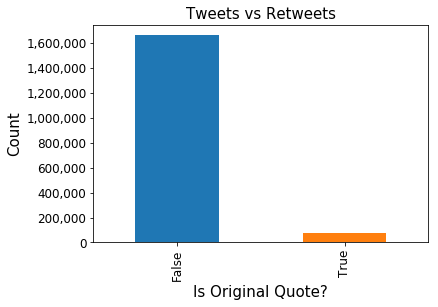

In [6]:
Tweet_Retweet_Count = df.groupby('is_quote')['is_quote'].count().plot(kind='bar')
plt.ylabel('Count',size=15)
plt.xlabel('Is Original Quote?',size=15)
plt.title('Tweets vs Retweets',size=15)
plt.xticks(size=12)
plt.yticks(size=12)
Tweet_Retweet_Count.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

The number of retweets in the dataset are significantly more than original quotes. This is expected since people generally tend to retweet instead of posting original tweets. 

We will use only the tweets that were retweeted for the analysis. This has all the metrics required. There are 1,662,372, tweets that were retweeted, which is sufficient for the analysis. 

In [11]:
#create a dataset only with the needed columns 
df_retweet = df.loc[:,['retweet_text','retweet_source','retweet_favorite_count','retweet_retweet_count',
                'retweet_followers_count','retweet_friends_count','retweet_statuses_count','retweet_location',
                'retweet_description','retweet_verified']]

In [12]:
df_retweet = df_retweet.rename(columns={'retweet_text':'Text','retweet_source':'Source',
                                        'retweet_favorite_count':'FavoriteCount','retweet_retweet_count':'RetweetCount',
                                       'retweet_followers_count':'FollowersCount','retweet_friends_count':'FriendsCount',
                                       'retweet_statuses_count':'StatusesCount','retweet_location':'Location',
                                       'retweet_description':'UserDescription','retweet_verified':'IsVerified'})

In [13]:
# remove the NA values in text column 
df_retweet = df_retweet.dropna(subset=['Text'])

In [10]:
df_retweet.shape

(996647, 10)

We have 996,647 tweets with text for analysis.

In [11]:
df_retweet.head()

,Text,Source,FavoriteCount,RetweetCount,FollowersCount,FriendsCount,StatusesCount,Location,UserDescription,IsVerified
0,"How does a politician, Cuomo, known for pushin...",Twitter for iPhone,14519.0,4465.0,53800122.0,47.0,38582.0,"Washington, DC",45th President of the United States of America🇺🇸,True
1,"By 2021, over 1.8 billion will use #digitalass...",Buffer,36.0,26.0,92125.0,4935.0,39625.0,"Los Angeles, CA",Managing Director @StrategyAnd / @PwC • EC @LA...,False
2,"Faith Family Friends saying on Kitchen Towel, ...",Twitter Web Client,6.0,12.0,6114.0,849.0,125173.0,"Plymouth, MA",Love having my wares/products at craft fairs a...,False
3,Check out 1982 Lefton China-Lord Bless Our Wor...,Twitter Web Client,0.0,1.0,369.0,895.0,651.0,"Louisiana, USA",Welcome!\n\nThanks for stopping by. I hope you...,False
4,Check out Sterling Silver Elephant Charm http...,Twitter Web Client,2.0,6.0,21121.0,20546.0,167453.0,"Beverly, MA","Mom 1st. Sea glass hunter, beach and animal lo...",False


## Tweet Source

Let's take a look at the devices used for posting the tweet (mobile device, web etc.). This is interesting data from a network provider perspective. If more users are using mobile devices then network providers can decide on the kind of services they need to provide (eg. 4g, 4g LTE etc.) to increase customer base. This will be more benefical if we break down the usage by location, which will help providers target potential markets. 

For the purposes of this analysis we will consider only 3 sources - Twitter for Anroid, Twitter for iPhone, Twitter for Web Client

In [12]:
SourceCount = df_retweet[(df_retweet.Source == 'Twitter for iPhone') | (df_retweet.Source == 'Twitter for Android') | 
                            (df_retweet.Source == 'Twitter Web Client')]

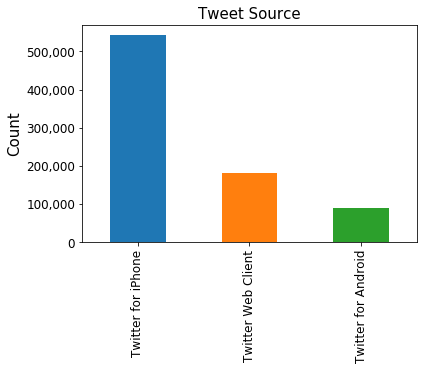

In [13]:
SourceCountPlot = SourceCount.groupby('Source')['Source'].count().reset_index(name='Count').sort_values(['Count'],ascending=False).plot(x = 'Source',
                                                                                    y='Count',kind='bar',legend=False)
plt.xlabel(' ')
plt.ylabel('Count',size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Tweet Source',size=15)
SourceCountPlot.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

Looks like more twitter users have an iphone. Good for Apple! Now, let's take a quick look from which states in the US we got the most tweets from iphone users.

In [14]:
# split the location column into city and state.
df_retweet['City'],df_retweet['State'] = df_retweet['Location'].str.split(',',1).str

In [15]:
iPhone = df_retweet[df_retweet.Source == 'Twitter for iPhone']

In [16]:
iPhone_stateCount = iPhone.groupby('State')['State'].count()

## Tweet Metrics

The two main metrics for a tweet are retweets and likes. Lets take a closer look at these two.

In [102]:
pd.options.display.float_format = '{:20,.0f}'.format

In [18]:
df_retweet[['FavoriteCount','RetweetCount']].describe()

,FavoriteCount,RetweetCount
count,"996,647","996,647"
mean,"19,437","7,626"
std,"48,991","23,746"
min,0,0
25%,46,19
50%,989,409
75%,"12,821","5,141"
max,"4,547,532","3,608,899"


C:\Users\ajays\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ajays\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


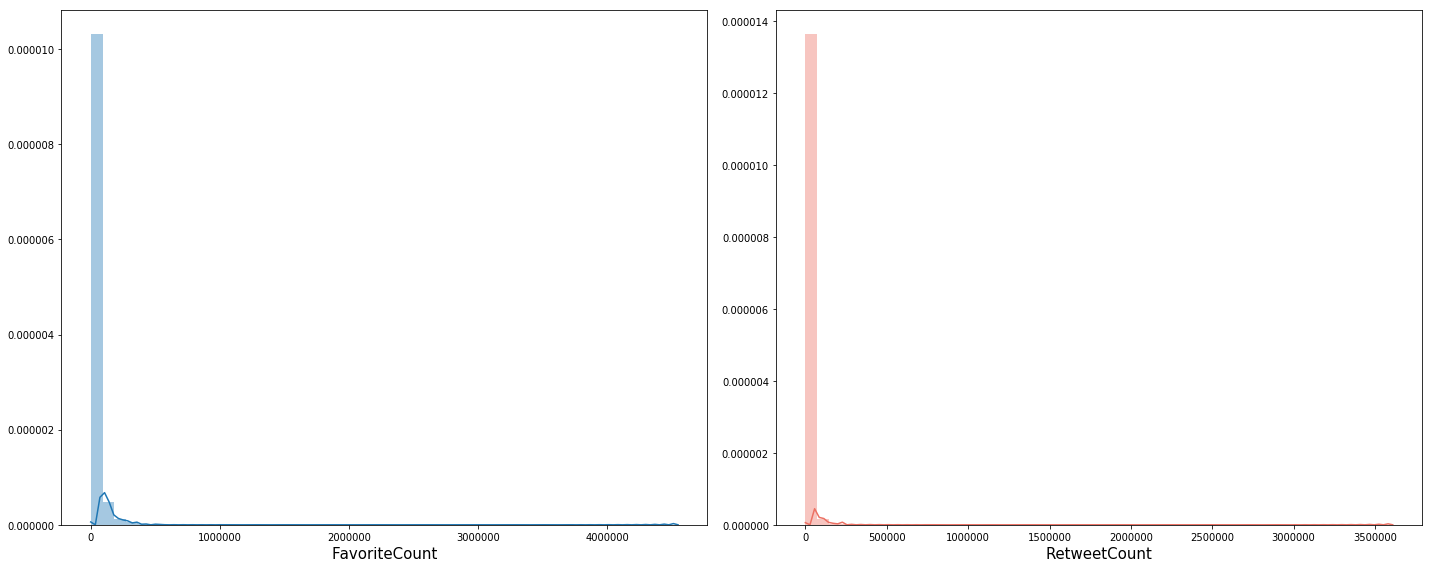

In [19]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df_retweet.FavoriteCount)
plt.xlabel('FavoriteCount',size=15)

plt.subplot(1,2,2)
sns.distplot(df_retweet.RetweetCount, color='#ec7063')
plt.xlabel('RetweetCount',size=15)

plt.tight_layout()
plt.show()

The likes and retweets are extremely skewed, as expected. 

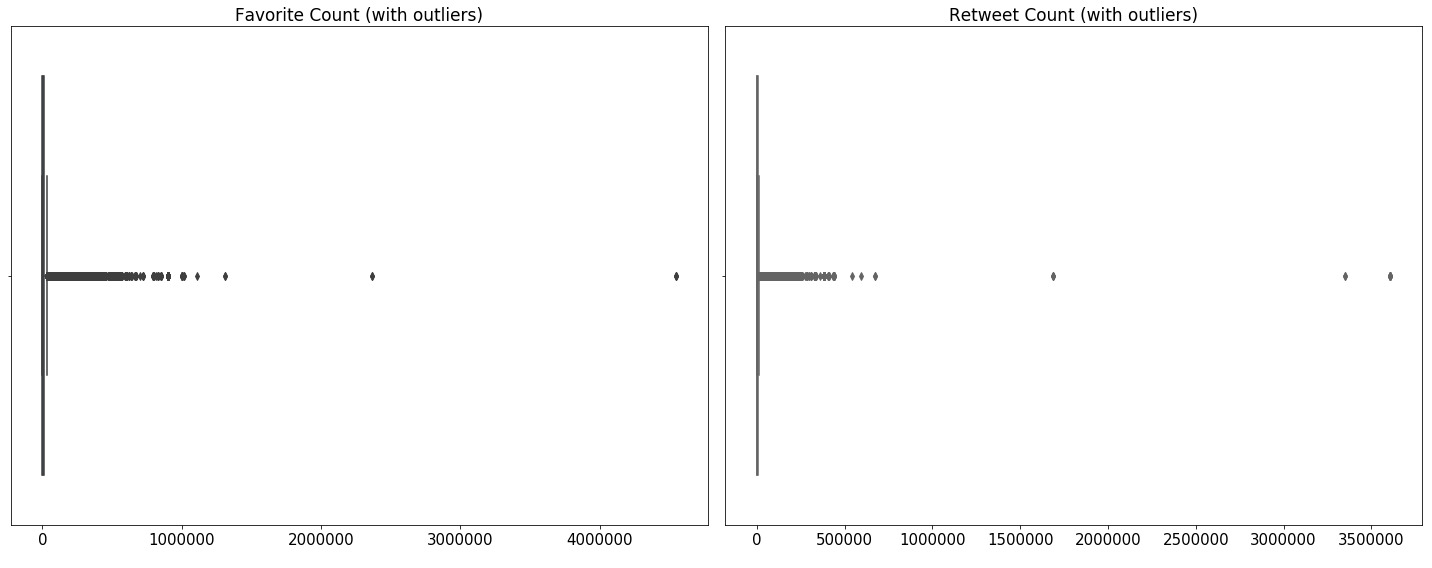

In [20]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(x=df_retweet.FavoriteCount)
plt.title('Favorite Count (with outliers)',size=17)
plt.xlabel(' ')
plt.xticks(size=15)

plt.subplot(1,2,2)
sns.boxplot(x=df_retweet.RetweetCount, color='#ec7063')
plt.title('Retweet Count (with outliers)',size=17)
plt.xlabel(' ')
plt.xticks(size=15)

plt.tight_layout()
plt.show()

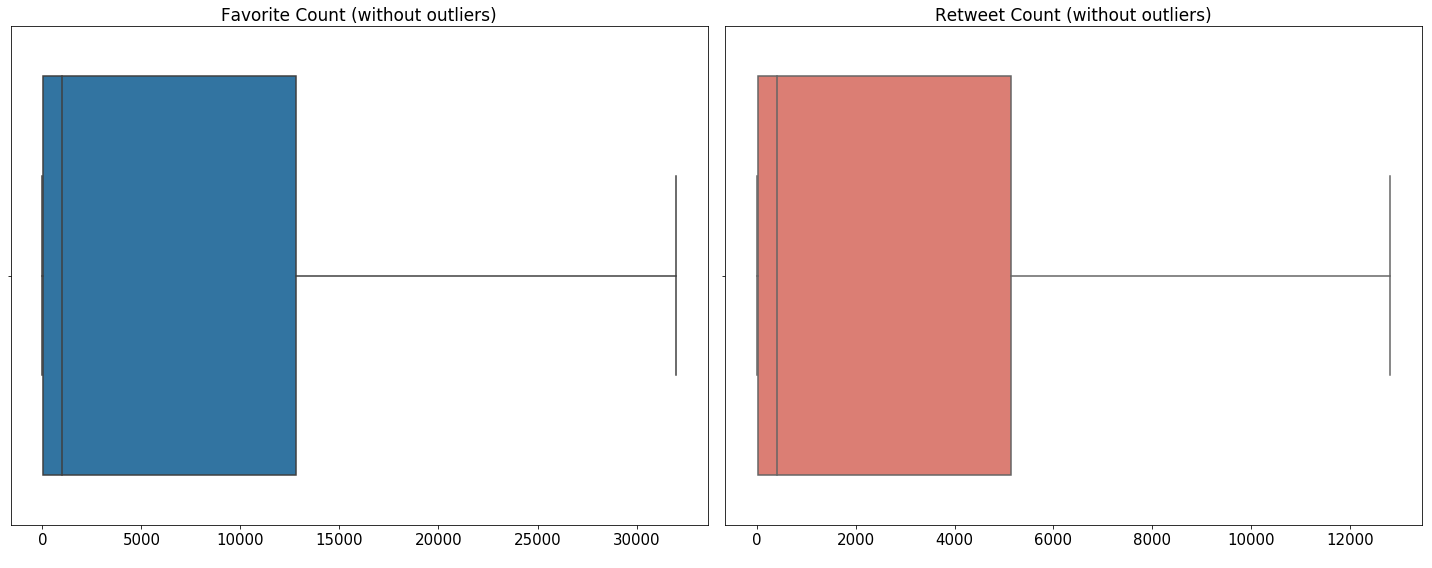

In [21]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(x=df_retweet.FavoriteCount,showfliers=False)
plt.title('Favorite Count (without outliers)',size=17)
plt.xlabel(' ')
plt.xticks(size=15)

plt.subplot(1,2,2)
sns.boxplot(x=df_retweet.RetweetCount, color='#ec7063',showfliers=False)
plt.title('Retweet Count (without outliers)',size=17)
plt.xlabel(' ')
plt.xticks(size=15)

plt.tight_layout()
plt.show()

The favorite counts are typically higher than the retweet counts. Lets see if there is a relationship between the favorites and retweet count. 

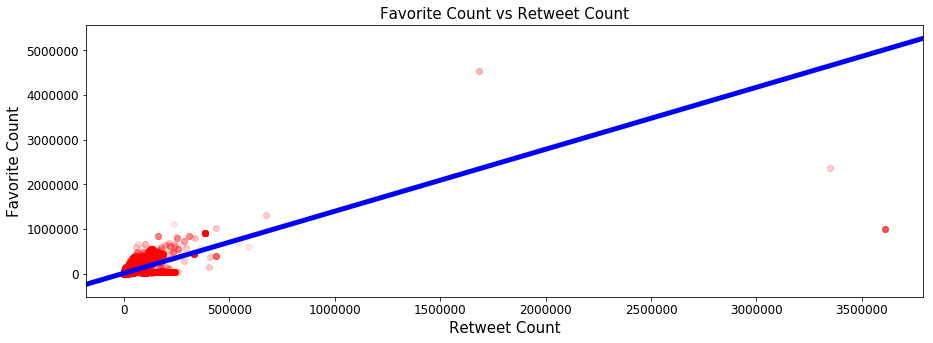

In [22]:
plt.figure(figsize=(15,5))
sns.regplot(df_retweet.RetweetCount, df_retweet.FavoriteCount, scatter_kws={"color":"red","alpha":0.1},ci=False,line_kws={"color":"b","alpha":1.0,"lw":5})
plt.xlabel('Retweet Count', size=15)
plt.ylabel('Favorite Count', size=15)
plt.title('Favorite Count vs Retweet Count', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

There is a strong positive correlation between the favorite and retweet count. We will check for the relationship without the outliers.

In [23]:
# remove favorite counts > 30000
df_retweet_noouts_FavCount = df_retweet[df_retweet.FavoriteCount < 30000]

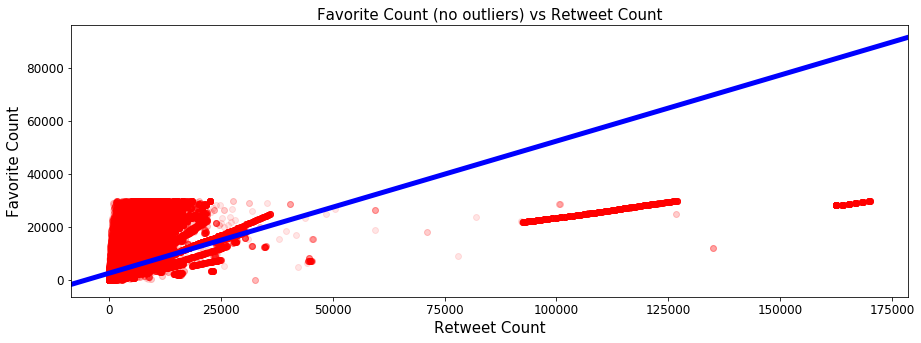

In [24]:
plt.figure(figsize=(15,5))
sns.regplot(df_retweet_noouts_FavCount.RetweetCount,df_retweet_noouts_FavCount.FavoriteCount, scatter_kws={"color":"red","alpha":0.1},ci=False,line_kws={"color":"b","alpha":1.0,"lw":5})
plt.xlabel('Retweet Count', size=15)
plt.ylabel('Favorite Count', size=15)
plt.title('Favorite Count (no outliers) vs Retweet Count', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

There is an overall positive correlation between the favorite and retweet count. This makes sense intutiviely. It is exptected that more the favorites, the higher the likely hood of retweets and vice-versa.

## User Metrics

Now we will look at the user information such as number of followers, number of other users followed, and total number of tweets.

In [25]:
df_retweet[['FollowersCount','FriendsCount','StatusesCount']].describe()

,FollowersCount,FriendsCount,StatusesCount
count,"996,647","996,647","996,647"
mean,"1,846,998","14,483","44,191"
std,"8,712,657","65,758","86,435"
min,0,0,0
25%,"2,135",324,"4,629"
50%,"18,780",871,"17,022"
75%,"167,401","3,037","45,217"
max,"101,802,394","2,122,181","9,108,873"


The mean value for the followers count is approx 1.8 mil with a standard deviation of 8 mil. It looks like the twitter scraper used for the analysis got data from a wide variety of accounts and is a good sample set for analysis. One person has close to 101 million followers!!! And an other user has posted a total of 9 miilion tweets!! Probably the the President of the US?

C:\Users\ajays\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ajays\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ajays\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


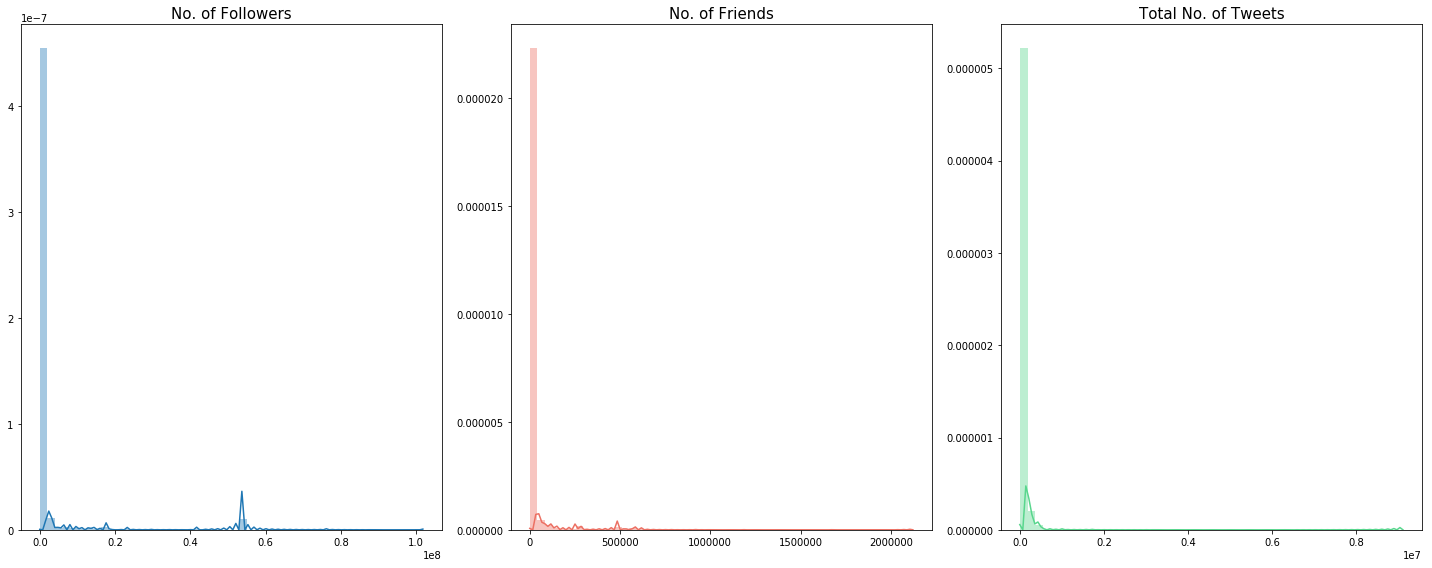

In [26]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.distplot(df_retweet.FollowersCount)
plt.xlabel(' ')
plt.title('No. of Followers',size=15)

plt.subplot(1,3,2)
sns.distplot(df_retweet.FriendsCount, color='#ec7063')
plt.xlabel(' ')
plt.title('No. of Friends',size=15)

plt.subplot(1,3,3)
sns.distplot(df_retweet.StatusesCount, color='#58d68d')
plt.xlabel(' ')
plt.title('Total No. of Tweets',size=15)

plt.tight_layout()
plt.show()

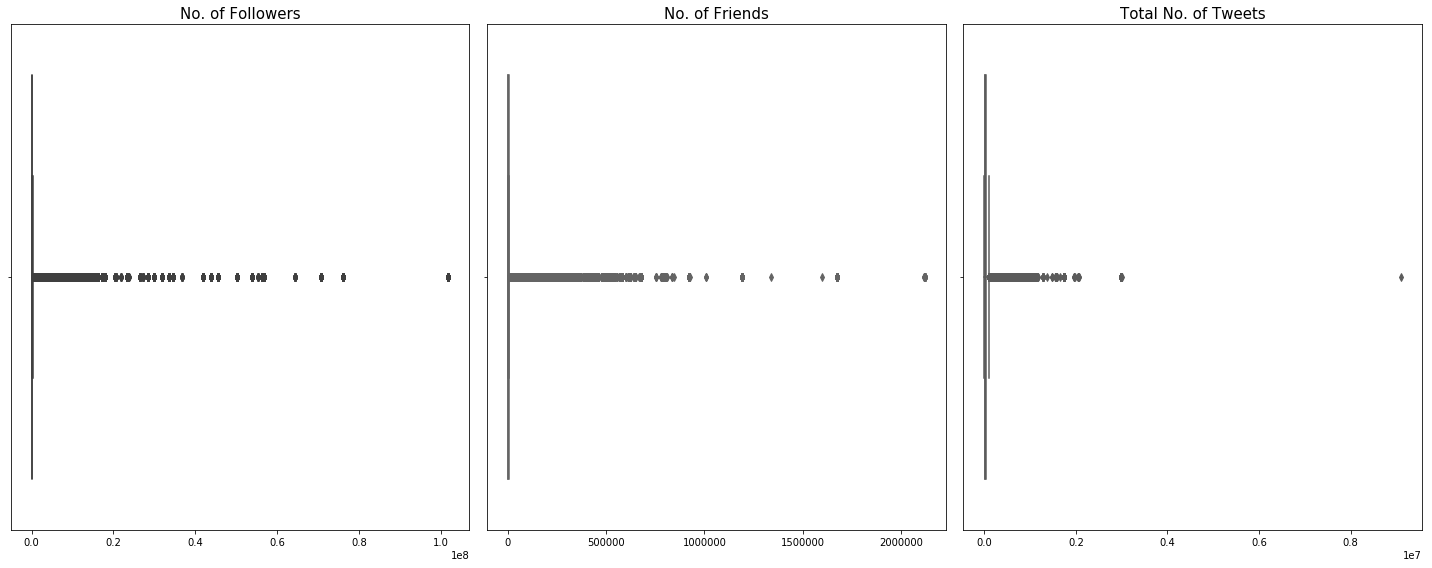

In [27]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.boxplot(x=df_retweet.FollowersCount)
plt.xlabel(' ')
plt.title('No. of Followers',size=15)

plt.subplot(1,3,2)
sns.boxplot(x= df_retweet.FriendsCount, color='#ec7063')
plt.xlabel(' ')
plt.title('No. of Friends',size=15)

plt.subplot(1,3,3)
sns.boxplot(x = df_retweet.StatusesCount, color='#58d68d')
plt.xlabel(' ')
plt.title('Total No. of Tweets',size=15)

plt.tight_layout()
plt.show()

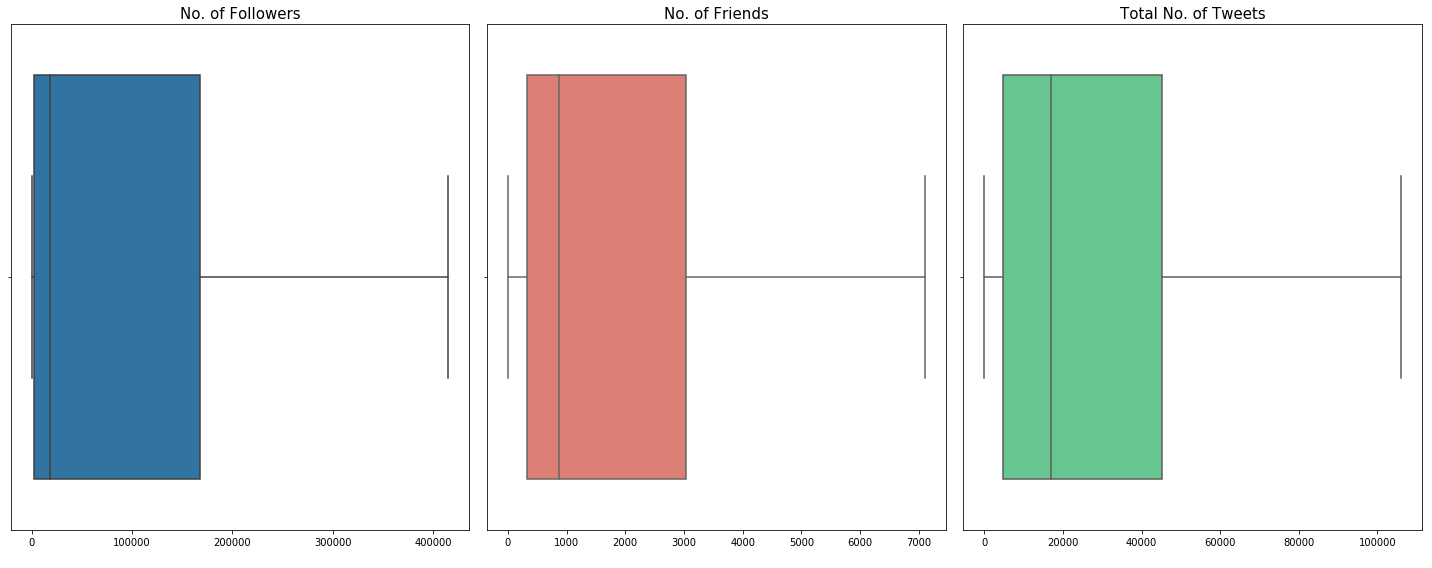

In [28]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.boxplot(x=df_retweet.FollowersCount,showfliers=False)
plt.xlabel(' ')
plt.title('No. of Followers',size=15)

plt.subplot(1,3,2)
sns.boxplot(x= df_retweet.FriendsCount, color='#ec7063',showfliers=False)
plt.xlabel(' ')
plt.title('No. of Friends',size=15)

plt.subplot(1,3,3)
sns.boxplot(x = df_retweet.StatusesCount, color='#58d68d',showfliers=False)
plt.xlabel(' ')
plt.title('Total No. of Tweets',size=15)

plt.tight_layout()
plt.show()

Since there is a lot of variance in the data we will look at correlations without the outliers. First, we will look at the relationship between the number of followers and total number of tweets. 

In [29]:
# remove user accounts with followers greater than 400,000
FollowerCount = df_retweet[df_retweet.FollowersCount <= 40000]

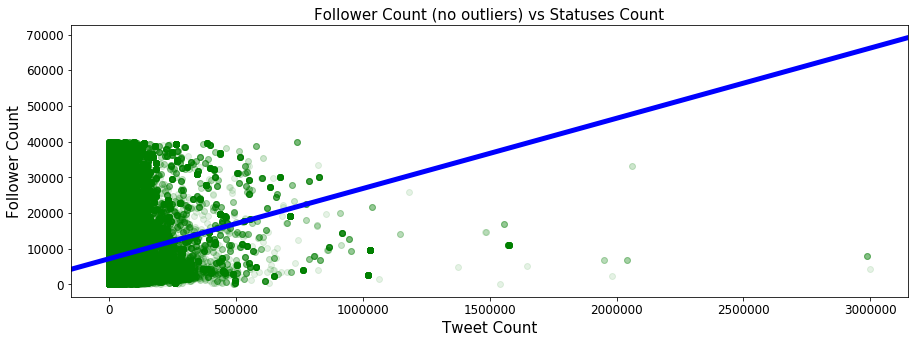

In [30]:
plt.figure(figsize=(15,5))
sns.regplot(FollowerCount.StatusesCount,FollowerCount.FollowersCount, scatter_kws={"color":"green","alpha":0.1},ci=False,line_kws={"color":"b","alpha":1.0,"lw":5})
plt.xlabel('Tweet Count', size=15)
plt.ylabel('Follower Count', size=15)
plt.title('Follower Count (no outliers) vs Statuses Count', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

Though the above plot indicates a strong positive correlation between the tweet count and follower count, this may be a function of the high value follower counts. There are users with very low status counts but high number of followers, especially for users with less than 500,000 tweers. We will take a further look at the relationship for all users with less than 100,000 tweets. 

In [31]:
TweetCount_lessthan100k = FollowerCount[FollowerCount.StatusesCount < 100000]

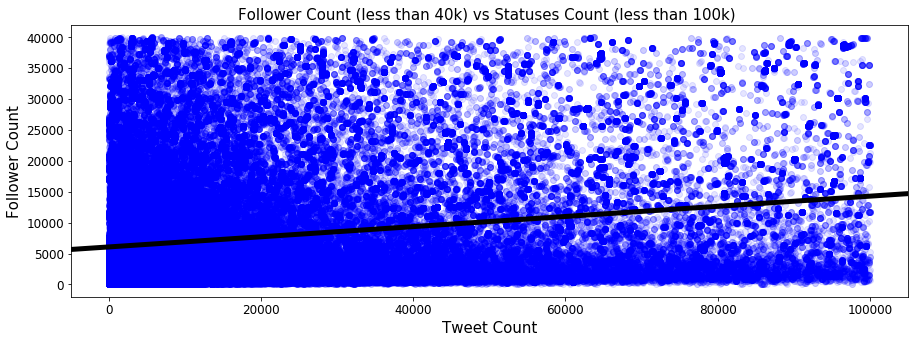

In [32]:
plt.figure(figsize=(15,5))
sns.regplot(TweetCount_lessthan100k.StatusesCount,TweetCount_lessthan100k.FollowersCount, scatter_kws={"color":"blue","alpha":0.1},ci=False,line_kws={"color":"black","alpha":1.0,"lw":5})
plt.xlabel('Tweet Count', size=15)
plt.ylabel('Follower Count', size=15)
plt.title('Follower Count (less than 40k) vs Statuses Count (less than 100k) ', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

The above plot shows only a slighty postive correlation between the followers and tweet count. A tweet count of 100k is pretty high. So it may not matter if you are constantly tweeting to gain followers. As the age old saying goes, 'Quality matters over Quantity'. There may be other external factors as well such as if you are account is verified etc. We will take a look at those later. 

## Tweet Metrics vs User Metrics

In this section we will explore the relationship between the tweet metrics and user metrics such as retweets and likes vs follower count. 

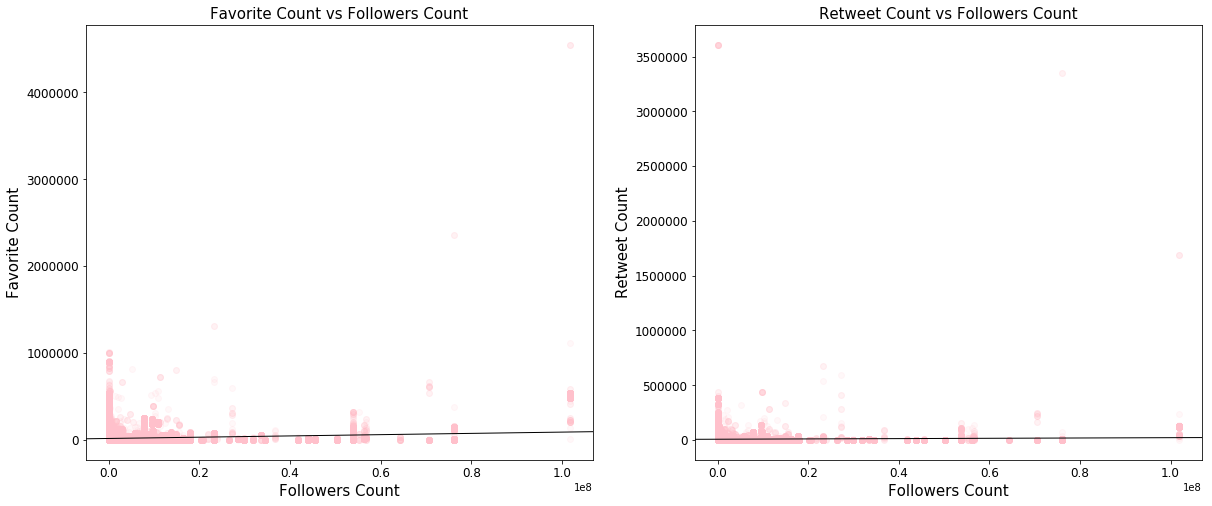

In [33]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.regplot(df_retweet.FollowersCount,df_retweet.FavoriteCount, scatter_kws={"color":"pink","alpha":0.1},ci=False,line_kws={"color":"black","alpha":1.0,"lw":1})
plt.xlabel('Followers Count', size=15)
plt.ylabel('Favorite Count', size=15)
plt.title('Favorite Count vs Followers Count', size=15)
plt.xticks(size=12)
plt.yticks(size=12)

plt.subplot(1,2,2)
sns.regplot(df_retweet.FollowersCount,df_retweet.RetweetCount, scatter_kws={"color":"pink","alpha":0.1},ci=False,line_kws={"color":"black","alpha":1.0,"lw":1})
plt.xlabel('Followers Count', size=15)
plt.ylabel('Retweet Count', size=15)
plt.title('Retweet Count vs Followers Count', size=15)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

It is interesting to see that the number of likes and retweets have no correlation with the followers count. I would have expected to see more retweets and likes if you had more number of followers. I guess, as stated earlier, the tweet must really matter!!

We will get into the text analysis later.

## Verified Accounts

In this section we will explore effect of a verified accounts. A verified account is indicated by a blue tick mark and is typically given to celebirities and sought after personalites that are at risk of impersonation. 

In [34]:
VerifiedCount = df_retweet.groupby('IsVerified')['IsVerified'].count().reset_index(name='Count')
MeanFollowers = df_retweet.groupby('IsVerified')['FollowersCount'].mean().reset_index(name='mean')
MeanLikes = df_retweet.groupby('IsVerified')['FavoriteCount'].mean().reset_index(name='mean')
MeanRetweets = df_retweet.groupby('IsVerified')['RetweetCount'].mean().reset_index(name='mean')

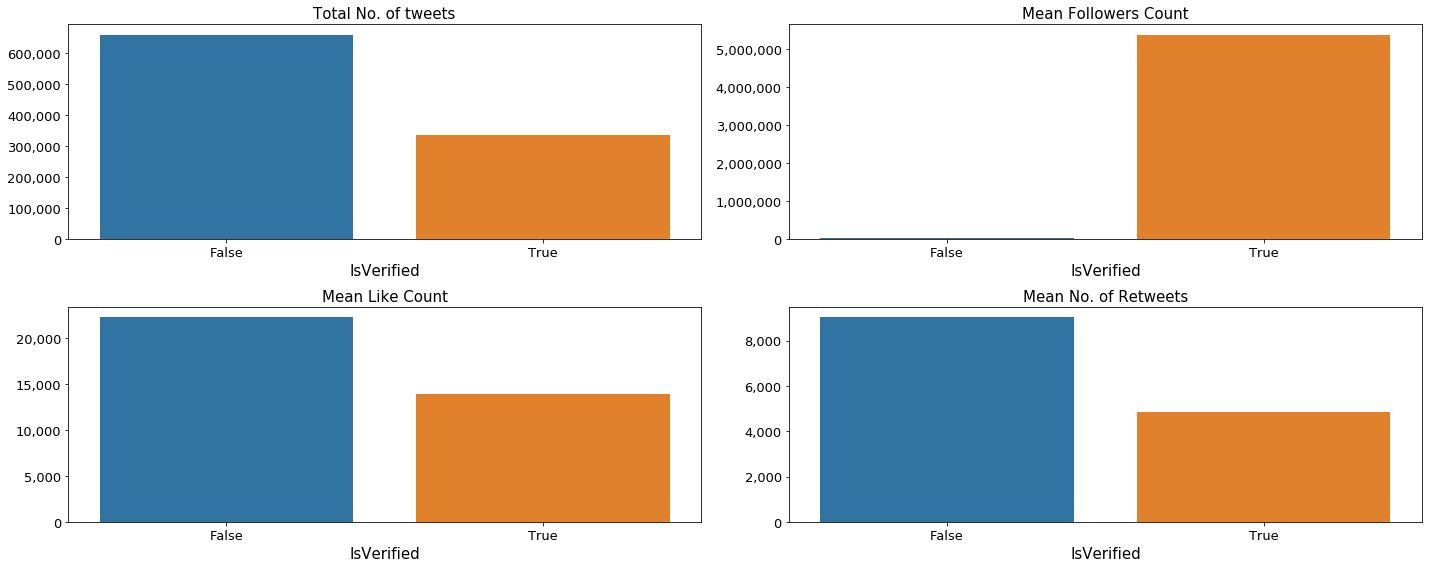

In [35]:
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.barplot(x='IsVerified',y='Count',data=VerifiedCount).yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Total No. of tweets',size=15)
plt.ylabel('')
plt.xlabel('IsVerified',size=15)
plt.xticks(size=13)
plt.yticks(size=13)

plt.subplot(2,2,2)
sns.barplot(x='IsVerified',y='mean',data=MeanFollowers).yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Mean Followers Count',size=15)
plt.ylabel('')
plt.xlabel('IsVerified',size=15)
plt.xticks(size=13)
plt.yticks(size=13)


plt.subplot(2,2,3)
sns.barplot(x='IsVerified',y='mean',data=MeanLikes).yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Mean Like Count',size=15)
plt.ylabel('')
plt.xlabel('IsVerified',size=15)
plt.xticks(size=13)
plt.yticks(size=13)


plt.subplot(2,2,4)
sns.barplot(x='IsVerified',y='mean',data=MeanRetweets).yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Mean No. of Retweets',size=15)
plt.ylabel('')
plt.xlabel('IsVerified',size=15)
plt.xticks(size=13)
plt.yticks(size=13)

plt.tight_layout()
plt.show()

The number of tweets from unverified accounts is almost double than the verified accounts. This is surprising to me since we would expect celebrities to tweet more. Note that these are retweets.

Mean followers count is as expected with more number of followers for the verified accounts.

It is surprising that the mean number of retweets and likes are siginifciantly higher for unverified accouts. Maybe content is king after all. It might be useful to analyze the tweets of some of these high unverified users with high retweet and like count. And compare that to verified users with low retweet and like counts.

## Text  Analysis

In this section we will analyze the tweet text in detail. As a first step we need to apply some cleaning methods to the text data such as removing punctuations, converting to lowercase and lemmatizing.

In [16]:
import re

In [17]:
# remove punctuations in the text column
df_retweet['Tweet_Punc_Removed'] = df_retweet['Text'].map(lambda x: re.sub('[_;,\.!?-]', '', x))

In [18]:
#convert text to lower case
df_retweet['Tweet_lowerCase'] = df_retweet['Tweet_Punc_Removed'].map(lambda x: x.lower())

In [19]:
# remove hyperlinks
df_retweet['Tweet_lowerCase_link_removed'] = df_retweet['Tweet_lowerCase'].map(lambda x: re.sub(r"(?:\@|https?\://)\S+", "",x))

In [20]:
# replace hasthags and mentions space
df_retweet['Tweet_lowercase_link_mentions_hashtags_removed'] = df_retweet['Tweet_lowerCase_link_removed'].map(lambda x: re.sub('[#@]','',x))

In [21]:
#replace '\n' from the tweets
df_retweet['Tweet_lowercase_link_mentions_hashtags_linesapce_removed'] = df_retweet['Tweet_lowercase_link_mentions_hashtags_removed'].map(lambda x: re.sub('[\n]',' ',x))

In [22]:
# get only text - remove numbers etc
df_retweet['tweet_final'] = df_retweet['Tweet_lowercase_link_mentions_hashtags_linesapce_removed'].map(lambda x: re.sub('[0-9]',' ',x))

In [23]:
# extract hashtags only as a column
df_retweet['hashtags'] = df_retweet['Text'].map(lambda x:  re.findall(r"#(\w+)", x))

In [40]:
df_retweet['hashtags_extracted'] = df_retweet['hashtags'].map(lambda x: ' '.join(x))

In [41]:
df_retweet.head()

,Text,Source,FavoriteCount,RetweetCount,FollowersCount,FriendsCount,StatusesCount,Location,UserDescription,IsVerified,City,State,Tweet_Punc_Removed,Tweet_lowerCase,Tweet_lowerCase_link_removed,Tweet_lowercase_link_mentions_hashtags_removed,Tweet_lowercase_link_mentions_hashtags_linesapce_removed,tweet_final,hashtags,hashtags_extracted
0,"How does a politician, Cuomo, known for pushin...",Twitter for iPhone,14519.0,4465.0,53800122.0,47.0,38582.0,"Washington, DC",45th President of the United States of America🇺🇸,True,Washington,DC,How does a politician Cuomo known for pushing ...,how does a politician cuomo known for pushing ...,how does a politician cuomo known for pushing ...,how does a politician cuomo known for pushing ...,how does a politician cuomo known for pushing ...,how does a politician cuomo known for pushing ...,[],
1,"By 2021, over 1.8 billion will use #digitalass...",Buffer,36.0,26.0,92125.0,4935.0,39625.0,"Los Angeles, CA",Managing Director @StrategyAnd / @PwC • EC @LA...,False,Los Angeles,CA,By 2021 over 18 billion will use #digitalassis...,by 2021 over 18 billion will use #digitalassis...,by 2021 over 18 billion will use #digitalassis...,by 2021 over 18 billion will use digitalassist...,by 2021 over 18 billion will use digitalassist...,by over billion will use digitalassist...,"[digitalassistants, artificialintelligence, AI...",digitalassistants artificialintelligence AI Al...
2,"Faith Family Friends saying on Kitchen Towel, ...",Twitter Web Client,6.0,12.0,6114.0,849.0,125173.0,"Plymouth, MA",Love having my wares/products at craft fairs a...,False,Plymouth,MA,Faith Family Friends saying on Kitchen Towel c...,faith family friends saying on kitchen towel c...,faith family friends saying on kitchen towel c...,faith family friends saying on kitchen towel c...,faith family friends saying on kitchen towel c...,faith family friends saying on kitchen towel c...,"[Handmade, ShopSmall, EtsyShop, EtsySocial, Re...",Handmade ShopSmall EtsyShop EtsySocial ReadyTo...
3,Check out 1982 Lefton China-Lord Bless Our Wor...,Twitter Web Client,0.0,1.0,369.0,895.0,651.0,"Louisiana, USA",Welcome!\n\nThanks for stopping by. I hope you...,False,Louisiana,USA,Check out 1982 Lefton ChinaLord Bless Our Work...,check out 1982 lefton chinalord bless our work...,check out 1982 lefton chinalord bless our work...,check out 1982 lefton chinalord bless our work...,check out 1982 lefton chinalord bless our work...,check out lefton chinalord bless our work...,[],
4,Check out Sterling Silver Elephant Charm http...,Twitter Web Client,2.0,6.0,21121.0,20546.0,167453.0,"Beverly, MA","Mom 1st. Sea glass hunter, beach and animal lo...",False,Beverly,MA,Check out Sterling Silver Elephant Charm http...,check out sterling silver elephant charm http...,check out sterling silver elephant charm via,check out sterling silver elephant charm via,check out sterling silver elephant charm via,check out sterling silver elephant charm via,[],


Now that we have applied some preliminary steps we will go plot a word cloud to check the frequently occuring words for the text data.

In [116]:
import wordcloud

In [46]:
s = ' '
long_string = s.join(df_retweet['tweet_final'])

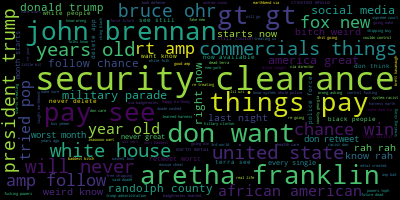

In [119]:
wordcloud = wordcloud.WordCloud()
wordcloud.generate(long_string)
wordcloud.to_image()

From the word cloud we can see a few words that stand out such as 'aretha franklin','john brennan','security',clearance' and 'president trump'. This makes sense because of the two important events that occurred on the day when the tweets were collected - death of aretha franklin and president trump revoking the security clearance for the ex-CIA director John Brennan. 

As a next step we will create a bag of words model using typical NLP techniques.

In [49]:
# import word_tokenize
from nltk.tokenize import word_tokenize

In [50]:
# import counter
from collections import Counter

In [187]:
tokens = word_tokenize(long_string)

In [188]:
word_count = Counter(tokens)

In [189]:
print(word_count.most_common(10))

[('the', 751501), ('to', 597815), ('a', 436587), ('’', 390462), ('and', 384726), ('i', 369139), ('of', 352499), ('you', 319075), ('in', 301139), ('is', 300754)]


The most frequent words are stop words, which is not useful. We will remove the stop words using count vectorizer and create an other bag of words. Since the tweet scraper had a filter for the english language we will check for only english stop words. 

In [229]:
count_vectorizer = CountVectorizer(stop_words = 'english')
count_data = count_vectorizer.fit_transform(df_retweet['tweet_final'])

In [236]:
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

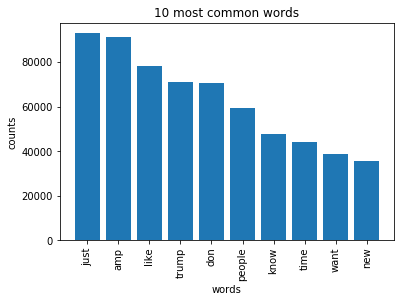

In [237]:
plot_10_most_common_words(count_data,count_vectorizer)

Now we will find the most common hashtags in the data.

In [48]:
hashtag_string = s.join(df_retweet['hashtags_extracted'])

In [51]:
tokens_hashtag = word_tokenize(hashtag_string)

In [52]:
hashtag_count = Counter(tokens_hashtag)

In [53]:
print(hashtag_count.most_common(10))

[('MAGA', 4584), ('BTSCitifield', 2397), ('FridayFeeling', 2093), ('Trump', 1653), ('WalkAway', 1352), ('BTS', 1337), ('Resist', 1236), ('SaturdayMorning', 1181), ('ALDUBIYAMonGMA', 1110), ('StopKavanaugh', 1058)]


In [56]:
hashtag_count_df = pd.DataFrame(hashtag_count.most_common(10),columns=list('xy'))

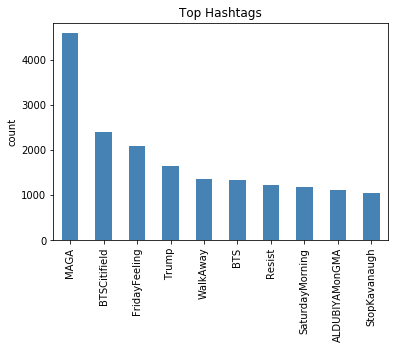

In [69]:
hashtag_count_df.plot(x='x',y='y',kind='bar',color='steelblue')
plt.xlabel('')
plt.ylabel('count')
plt.title('Top Hashtags')
plt.legend().set_visible(False)
plt.show()

MAGA had as substantial number of retweets. No surprises there! I guess MAGA will always be in the top 10 anyday until we have a change in the President. The interesting one is 'ALDUBIYAMonGMA'. Initially i thought this was junk. But this is an actual trending topic that day. It is a movie of some kind. Surprising 'aretha franklin' is not showing up in the top 10. It was an unfortunate day of her passing away.


We will follow the same analysis for the mentions.

In [86]:
# get the mentions from a tweet
df_retweet['Mentions'] = df_retweet['Text'].map(lambda x:  re.findall(r"@(\w+)", x))

In [88]:
# combine all mentions as a string
df_retweet['MentionsExtracted'] = df_retweet['Mentions'].map(lambda x: ' '.join(x))

In [90]:
# convert mentions to lower case
df_retweet['MentionsExtracted'] = df_retweet['MentionsExtracted'].map(lambda x: x.lower())

In [92]:
# create a string for all the mentions
Mentions_string = s.join(df_retweet['MentionsExtracted'])

In [93]:
tokens_mentions = word_tokenize(Mentions_string)
mentions_count = Counter(tokens_mentions)
print(mentions_count.most_common(10))

[('realdonaldtrump', 15825), ('bts_twt', 9581), ('potus', 4059), ('cnn', 3878), ('originalfunko', 3513), ('maddow', 2615), ('citifield', 2207), ('foxnews', 2063), ('johnbrennan', 2030), ('msnbc', 1670)]


In [94]:
mentions_count_df = pd.DataFrame(mentions_count.most_common(10),columns=list('xy'))

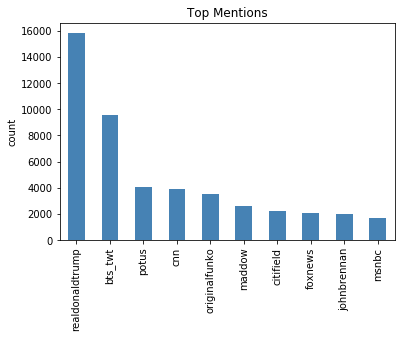

In [96]:
mentions_count_df.plot(x='x',y='y',kind='bar',color='steelblue')
plt.xlabel('')
plt.ylabel('count')
plt.title('Top Mentions')
plt.legend().set_visible(False)
plt.show()

Top mention is donaldtrump. No surprises here! We also have three news channels in top mentions. Guess it was a news heavy day with John Brennan as mentioned before. Surprisingly 'original funko' makes an appearance. It is a company that manufactures licensed pop culture collectibles. Wonder why people were tweeting about that on August 16? Looks like they had a very uneventful day.

We will add a few more columns before we get in to prediction and modeling.

In [77]:
# we will calculate the length for the cleaned tweet
df_retweet['TextLength'] = df_retweet['tweet_final'].map(lambda x: len(x))

In [82]:
# we will calculate the hashtag count
df_retweet['HashtagCount'] = df_retweet['hashtags'].map(lambda x: len(x))

In [97]:
# we will calculate the mentions count 
df_retweet['Mentions_Count'] = df_retweet['Mentions'].map(lambda x: len(x))

In [99]:
cols = ['FavoriteCount','RetweetCount','FollowersCount','FriendsCount','StatusesCount','IsVerified','tweet_final','hashtags_extracted','TextLength','HashtagCount','MentionsExtracted','Mentions_Count']
df_retweet_analysis = df_retweet.loc[:,cols]

In [108]:
df_forModel = df_retweet_analysis

## Prediction Analysis and Modeling

In this section we will deep dive into the predictive modeling and machine learning techniques. The target variable will be the favorites count and retweet count(will be analyzed independently) . We will divide the favorite counts and retweet count into 4 categories as below. We will analyze this as a multi-class label problem.

0 - 100 : 'Low'  
101 - 1000: 'Medium'  
1001 - 10000 : 'Medium_High'  
Greater than 10001 : 'High'  

In [112]:
df_forModel['FavoriteCount'] = df_forModel['FavoriteCount'].astype('int')

In [123]:
# add favorite category columns 
df_forModel['FavCount_Low'] = np.where(df_forModel['FavoriteCount'] <= 100,1,0)
df_forModel['FavCount_Medium'] = np.where((df_forModel['FavoriteCount'] > 100) & (df_forModel['FavoriteCount'] <= 1000),1,0)
df_forModel['FavCount_MediumHigh'] = np.where((df_forModel['FavoriteCount'] > 1000) & (df_forModel['FavoriteCount'] <= 10000),1,0)
df_forModel['FavCount_High'] = np.where(df_forModel['FavoriteCount'] >= 10000,1,0)                                             

In [136]:
df_forModel['Fav_Cat'] = np.where(df_forModel['FavoriteCount'] <= 100,'Low',
                            np.where((df_forModel['FavoriteCount'] > 100) & (df_forModel['FavoriteCount'] <= 1000),'Medium',
                           np.where((df_forModel['FavoriteCount'] > 1000) & (df_forModel['FavoriteCount'] <= 10000),'Medium_High','High')))      

We will first predict the labels without the text data.

### _Favorite Count Prediction_

In [138]:
X = df_forModel.loc[:,['RetweetCount','StatusesCount','FollowersCount','FriendsCount','IsVerified','TextLength','HashtagCount','Mentions_Count']].values
y = df_forModel.loc[:,['Fav_Cat']].values

In [183]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

In [139]:
# split into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [141]:
clf_LogReg =  OneVsRestClassifier(LogisticRegression())

In [142]:
clf_LogReg.fit(X_train,y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [143]:
clf_LogReg_accuracy = clf_LogReg.score(X_test,y_test)

In [144]:
print ("\nAccuracy using Logistic Regression ", clf_LogReg_accuracy )


Accuracy using Logistic Regression  0.7686382715430023


The accuracy score is approximately 77% using LogisticRegression for predicting the favorite count category. This is not bad for a first model. We will apply scaling techinques to see if we can improve the accuracy.

In [152]:
from sklearn.preprocessing import MaxAbsScaler,StandardScaler

In [172]:
# instantiate pipeline
pl = Pipeline([
        ('scale', StandardScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ]) 

In [157]:
pl.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1))])

In [158]:
accuracy = pl.score(X_test,y_test)
print ("\nAccuracy with Logistic Regression and standard scaler", accuracy)


Accuracy with Logistic Regression and standard scaler 0.7806819512031974


There is a small increase in accuracy by 2% to 78%. We try a Decision tree classifier to see if there is an increase in accuracy.

In [197]:
pl_DecisionTree = Pipeline([
        ('scale', StandardScaler()),
        ('clf', OneVsRestClassifier(DecisionTreeClassifier()))
    ]) 

In [178]:
pl_DecisionTree.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', OneVsRestClassifier(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          n_jobs=1))])

In [180]:
accuracy = pl_DecisionTree.score(X_test,y_test)
print ("\nAccuracy with Decision Tree Classifier", accuracy)


Accuracy with Decision Tree Classifier 0.9348718205990066


The accuracy is 94% with a decision tree classifier. This is really good. We will try the same for the retweet count.

### _Retweet Count Prediction_

Retweet classes:  

0 - 100: 'Low'  
101 - 1000: 'Medium'  
1001 - 10000: 'Medium High'  
Greater than 10001: 'High  

In [190]:
# Add retweet classes
df_forModel['RT_Cat'] = np.where(df_forModel['RetweetCount'] <= 100,'Low',
                            np.where((df_forModel['RetweetCount'] > 100) & (df_forModel['RetweetCount'] <= 1000),'Medium',
                           np.where((df_forModel['RetweetCount'] > 1000) & (df_forModel['RetweetCount'] <= 10000),'Medium_High','High')))      

In [193]:
X = df_forModel.loc[:,['FavoriteCount','StatusesCount','FollowersCount','FriendsCount','IsVerified','TextLength','HashtagCount','Mentions_Count']].values
y = df_forModel.loc[:,['RT_Cat']].values

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [198]:
pl_DecisionTree.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', OneVsRestClassifier(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          n_jobs=1))])

In [200]:
accuracy = pl_DecisionTree.score(X_test,y_test)
print ("\nAccuracy with Decision Tree Classifier for RT count", accuracy)


Accuracy with Decision Tree Classifier for RT count 0.9527249619558855


The accuracy is 95% for the retweet count. We will now add the text column for the analysis and see how the accuracy changes.

### _Favorite Count Prediction with Text_

we will first predict the favorite count only with the tweet_final column